In [39]:
from google.colab import files
uploaded = files.upload()

Saving Alcohol_Sales.csv to Alcohol_Sales (1).csv


In [85]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

df = pd.read_csv('Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

df

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [86]:
scaler = MinMaxScaler()
train_size = int(len(data) * 0.8)
train = scaler.fit_transform(data[:train_size])
test  = scaler.transform(data[train_size:])

In [96]:
window = 12

def make_window(arr):
    X, y = [], []
    for i in range(len(arr)-window):
        X.append(arr[i:i+window])
        y.append(arr[i+window])
    return np.array(X), np.array(y)

X_train, y_train = make_window(train)
X_test, y_test   = make_window(test)

In [97]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(window, X_train.shape[-1])),
    tf.keras.layers.SimpleRNN(64, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(3e-4), loss='mse')
history = model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=1, shuffle=True)

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1606
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0337
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0153
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0159
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0109
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0117
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0108
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0095
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0099
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0094
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0088
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0078
Epoch 13/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0090
Epoch 14/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0077
Epoch 15/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0083
Epoch 16/200
8/8 ━━

In [98]:
y_pred = model.predict(X_test, verbose=0)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.8f}")

MSE: 0.00886411


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


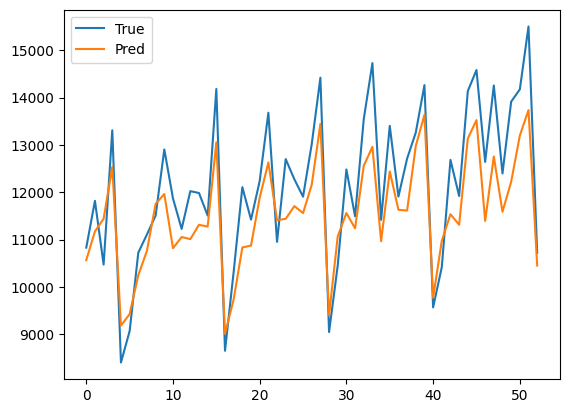

In [99]:
pred = model.predict(X_train)
plt.plot(scaler.inverse_transform(y_test), label='True')
plt.plot(scaler.inverse_transform(y_pred), label='Pred')
plt.legend(); plt.show()